# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice = combined_data['Mouse ID'].nunique()
print(f'{number_of_mice}')

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.


duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
print(duplicate_mice)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)]
duplicate_mice_data.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mice_data = combined_data[~combined_data['Mouse ID'].isin(duplicate_mice)]
cleaned_mice_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = len(cleaned_mice_data['Mouse ID'].unique())
print(number_of_mice_clean)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


summary_statistics = cleaned_mice_data.groupby('Drug Regimen').agg(
 Mean_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Median_Tumor_Volume=('Tumor Volume (mm3)', 'median'),
    Tumor_Volume_Variance=('Tumor Volume (mm3)', 'var'),
    Tumor_Volume_Std_Dev=('Tumor Volume (mm3)', 'std'),
    Tumor_Volume_SEM=('Tumor Volume (mm3)', 'sem')).reset_index()

summary_statistics.head()

,Drug Regimen,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics_single_line = cleaned_mice_data.groupby('Drug Regimen').agg(
     mean=('Tumor Volume (mm3)', 'mean'),
    median=('Tumor Volume (mm3)', 'median'),
    var=('Tumor Volume (mm3)', 'var'),
    std=('Tumor Volume (mm3)', 'std'),
    sem=('Tumor Volume (mm3)', 'sem')
).reset_index()

summary_statistics_single_line.head()


,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

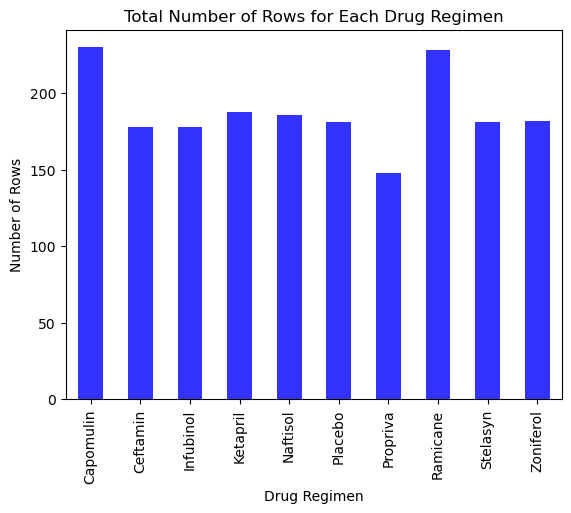

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_regimen_counts = cleaned_mice_data.groupby('Drug Regimen').size()

drug_regimen_counts.plot(kind='bar', title='Total Number of Rows for Each Drug Regimen', color='blue', alpha=0.8)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.show()


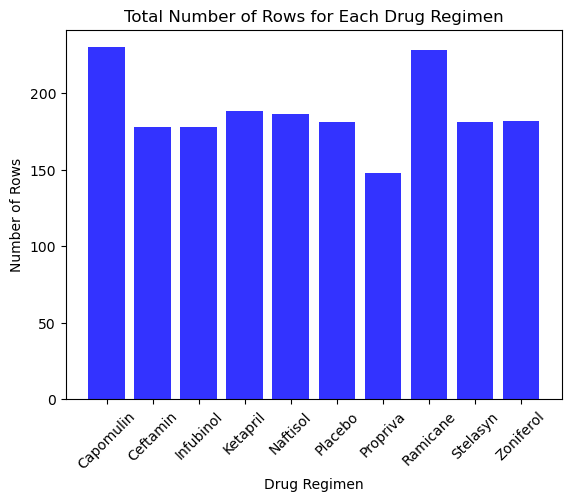

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.



drug_regimen_counts = cleaned_mice_data.groupby('Drug Regimen').size()


plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color='blue', alpha=0.8)
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


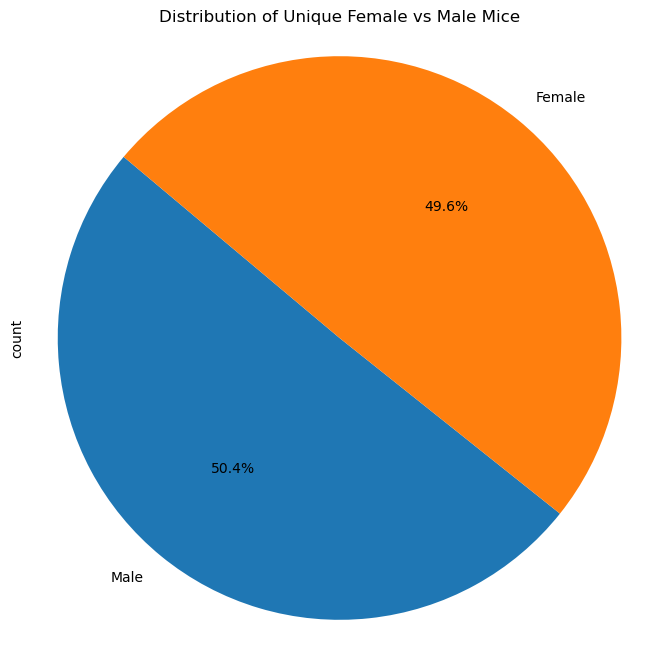

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_data = cleaned_mice_data.drop_duplicates(subset=['Mouse ID'])
gender_counts = unique_mice_data['Sex'].value_counts()
# Make the pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(8, 8), title='Distribution of Unique Female vs Male Mice')
plt.axis('equal')  
plt.show()

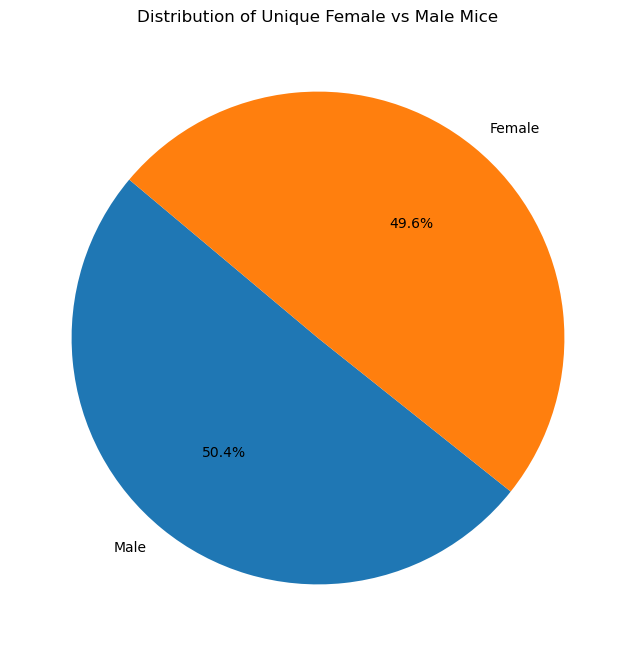

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_data = cleaned_mice_data.drop_duplicates(subset=['Mouse ID'])
gender_counts = unique_mice_data['Sex'].value_counts()

# Make the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Unique Female vs Male Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_greatest_timepoint = cleaned_mice_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_greatest_timepoint, cleaned_mice_data, on=['Mouse ID', 'Timepoint'], how='left')

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = {treatment: [] for treatment in treatments}

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = cleaned_mice_data[cleaned_mice_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

    # add subset
    tumor_vol_data[treatment] = treatment_data

    # Determine outliers using upper and lower bounds
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0.5, 0, 'Treatment')

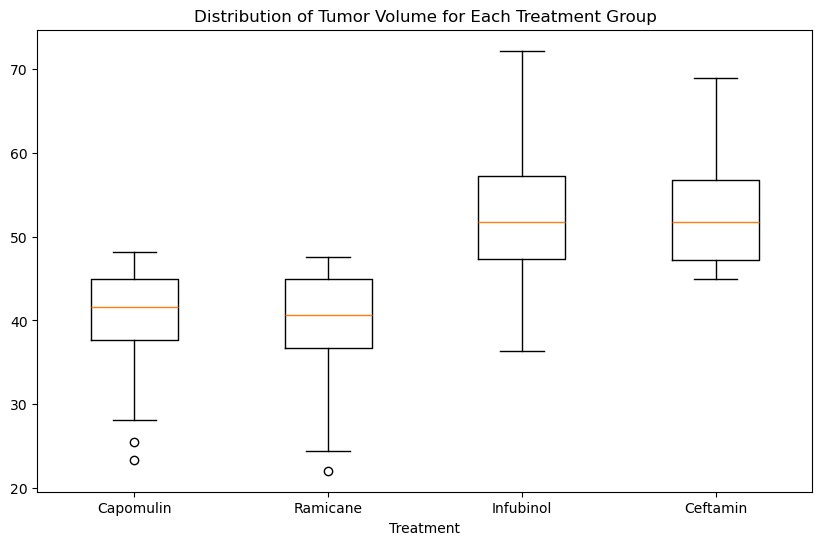

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

data = [tumor_vol_data[treatment] for treatment in treatments]


plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=treatments)


plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment')




## Line and Scatter Plots

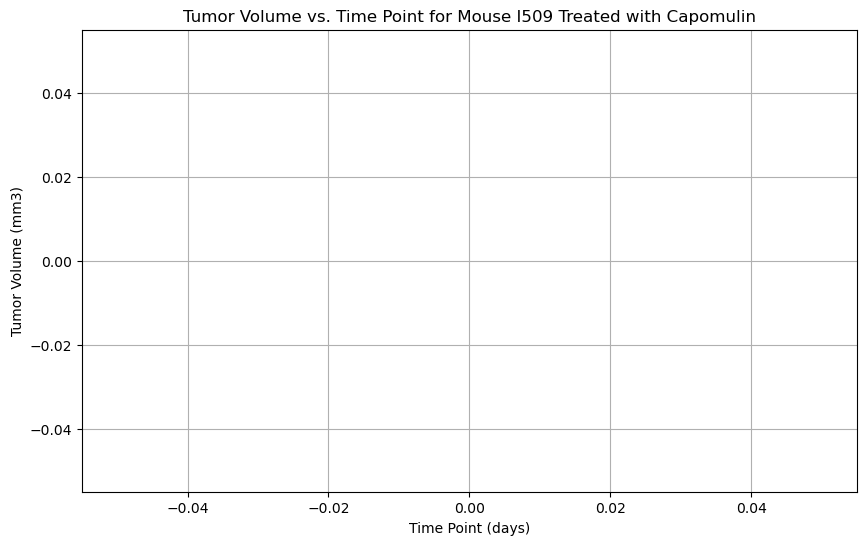

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

single_mouse_id = 'I509'

capomulin_data = cleaned_mice_data[(cleaned_mice_data['Mouse ID'] == single_mouse_id) & 
                                   (cleaned_mice_data['Drug Regimen'] == 'Capomulin')]

timepoints = capomulin_data['Timepoint']
tumor_volumes = capomulin_data['Tumor Volume (mm3)']

plt.figure(figsize=(10, 6))
plt.plot(timepoints, tumor_volumes, marker='o')
plt.title(f'Tumor Volume vs. Time Point for Mouse {single_mouse_id} Treated with Capomulin')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

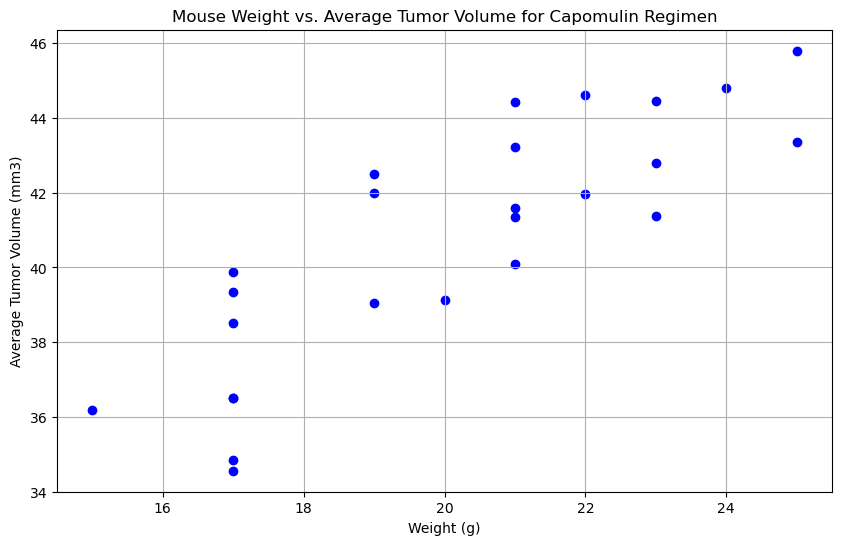

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = cleaned_mice_data[cleaned_mice_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, color='blue')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()



## Correlation and Regression

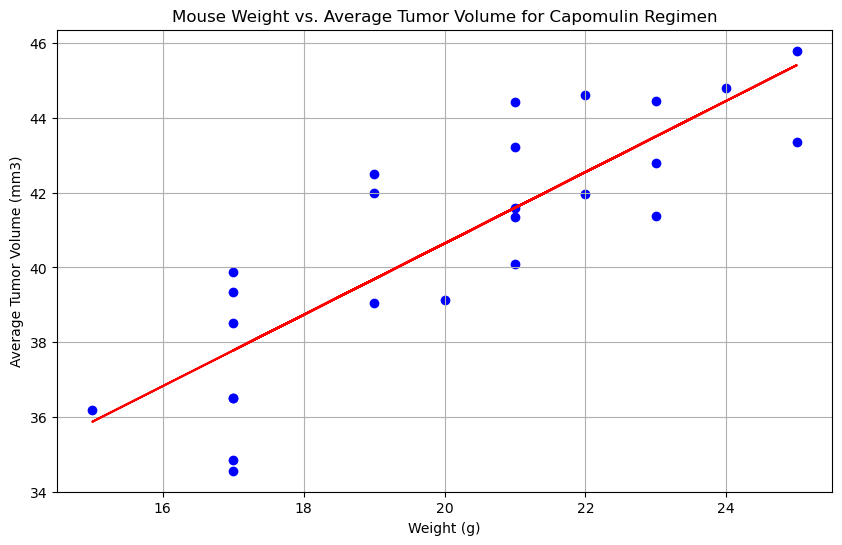

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_data = cleaned_mice_data[cleaned_mice_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

correlation_coefficient = sum((mouse_weight - mouse_weight.mean()) * (average_tumor_volume - average_tumor_volume.mean())) / ((len(mouse_weight) - 1) * mouse_weight.std() * average_tumor_volume.std())
slope = sum((mouse_weight - mouse_weight.mean()) * (average_tumor_volume - average_tumor_volume.mean())) / sum((mouse_weight - mouse_weight.mean())**2)
intercept = average_tumor_volume.mean() - slope * mouse_weight.mean()

regression_line = slope * mouse_weight + intercept


plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, color='blue')
plt.plot(mouse_weight, regression_line, color='red')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()






